In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

##### Importing Data Set

In [5]:
data=pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
# Checking information about data.
print(data.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
...,...,...,...,...,...
max_rech_amt_7,int64,99999,0,0.00,183
max_rech_amt_6,int64,99999,0,0.00,202
total_rech_amt_9,int64,99999,0,0.00,2304
total_rech_amt_8,int64,99999,0,0.00,2347


##### Understanding the Data

In [7]:
data['mobile_number'].value_counts().sum()

99999

In [8]:
data = data.set_index('mobile_number')

In [9]:
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

##### Data Type check for columns and data cleaning

In [10]:
columns=data.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=data[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and data[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0     loc_og_t2o_mou
1     std_og_t2o_mou
2     loc_ic_t2o_mou
3   std_og_t2c_mou_6
4   std_og_t2c_mou_7
5   std_og_t2c_mou_8
6   std_og_t2c_mou_9
7   std_ic_t2o_mou_6
8   std_ic_t2o_mou_7
9   std_ic_t2o_mou_8
10  std_ic_t2o_mou_9
11   count_rech_3g_6
12   count_rech_3g_7
13   count_rech_3g_8
14   count_rech_3g_9
15  night_pck_user_6
16  night_pck_user_7
17  night_pck_user_8
18  night_pck_user_9
19         fb_user_6
20         fb_user_7
21         fb_user_8
22         fb_user_9 



In [11]:
data[change_to_cat]=data[change_to_cat].astype('category')
sachet_columns = data.filter(regex='.*sachet.*', axis=1).columns.values
data[sachet_columns] = data[sachet_columns].astype('category')

##### Changing the data type of column to 'datetime'

In [12]:
columns=data.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
data[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [13]:
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7001865778,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
7001625959,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
7001204172,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
7000142493,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [14]:
for col in col_with_date:
    data[col]=pd.to_datetime(data[col], format="%m/%d/%Y")
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
7001865778,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
7001625959,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
7001204172,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
7000142493,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


##### Filtering High Value Customers

##### High Value Customers are hose who have recharged with an amount more than or equal to X, where X is the 70th percentile of  the average recharge amount in the first two months(the good phase)

In [15]:
#Deriving Avg recharge amount of June and July
data['Average_rech_amt_6n7']=(data['total_rech_amt_6']+data['total_rech_amt_7'])/2

In [16]:
data=data[(data['Average_rech_amt_6n7']>= data['Average_rech_amt_6n7'].quantile(0.7))]

##### Missing Value Check

In [17]:
missing_values = metadata_matrix(data)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
av_rech_amt_data_6,float64,62.02
count_rech_2g_6,float64,62.02
arpu_2g_6,float64,62.02
max_rech_data_6,float64,62.02
night_pck_user_6,category,62.02
...,...,...
total_rech_num_8,int64,0.00
total_rech_num_7,int64,0.00
total_rech_num_6,int64,0.00
total_ic_mou_9,float64,0.00


In [18]:
metadata = metadata_matrix(data)
condition = metadata['Null_Percentage'] > 50 
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_6,float64,11397,18614,62.02,794
count_rech_3g_6,category,11397,18614,62.02,25
count_rech_2g_6,float64,11397,18614,62.02,30
arpu_2g_6,float64,11397,18614,62.02,4503
max_rech_data_6,float64,11397,18614,62.02,43
night_pck_user_6,category,11397,18614,62.02,2
date_of_last_rech_data_6,datetime64[ns],11397,18614,62.02,30
total_rech_data_6,float64,11397,18614,62.02,36
arpu_3g_6,float64,11397,18614,62.02,4875
fb_user_6,category,11397,18614,62.02,2


##### Dropping columns with high number of missing values

In [19]:
high_missing_value_columns = high_missing_values.index 
data.drop(columns=high_missing_value_columns, inplace=True)

In [20]:
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_9,category,28307,1704,5.68,1
spl_og_mou_9,float64,28307,1704,5.68,2966
isd_og_mou_9,float64,28307,1704,5.68,908
roam_ic_mou_9,float64,28307,1704,5.68,3370
std_og_mou_9,float64,28307,1704,5.68,15900
...,...,...,...,...,...
max_rech_amt_8,int64,30011,0,0.00,182
max_rech_amt_9,int64,30011,0,0.00,186
last_day_rch_amt_6,int64,30011,0,0.00,158
last_day_rch_amt_7,int64,30011,0,0.00,149


##### Analysis Comments:-
1. Data contains information of 04 months - 6,7,8,9.
2. For the purpose of missing value treatment, each month's revenue and usage data is not related to the other months.
3. Hence missing value treatment could be performed month wise.

##### Missing Value Treatment - Month 6

In [21]:
sixth_month_columns = []
for column in data.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)

metadata = metadata_matrix(data)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_mou_6,float64,29695,316,1.05,8391
offnet_mou_6,float64,29695,316,1.05,22454
std_ic_t2f_mou_6,float64,29695,316,1.05,2033
isd_ic_mou_6,float64,29695,316,1.05,3429
ic_others_6,float64,29695,316,1.05,1227
onnet_mou_6,float64,29695,316,1.05,18813
std_ic_t2m_mou_6,float64,29695,316,1.05,6680
loc_ic_t2t_mou_6,float64,29695,316,1.05,9872
loc_ic_t2m_mou_6,float64,29695,316,1.05,16015
loc_ic_t2f_mou_6,float64,29695,316,1.05,4817


##### Analysis Comments:-
1. All the columns with *_mou have exactly 3.94% rows with missing values. This is an indicator of a meaningful missing values.
2. We can see that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. 
3. It is probable that, the 3.94% customers not using calling plans.
4. This could confirmed by looking at 'total_og_mou_6' and 'total_ic_mou_6' related columns where _mou columns have missing values

In [22]:
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.05
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['std_ic_mou_6', 'offnet_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'og_others_6', 'spl_og_mou_6',
       'roam_ic_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2c_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'loc_og_t2t_mou_6',
       'isd_og_mou_6', 'roam_og_mou_6', 'loc_og_mou_6'], dtype=object)

In [23]:
# Looking at all sixth month columns where rows of *_mou are null
condition = data[sixth_month_meaningful_missing_cols].isnull()
# data.loc[condition, sixth_month_columns]

 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in sixth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


##### Imputation 

In [24]:
data[sixth_month_meaningful_missing_cols] = data[sixth_month_meaningful_missing_cols].fillna(0)
metadata = metadata_matrix(data)

In [25]:
metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


##### Analysis comments - 1.61% customers with missing date of last recharge

In [26]:
condition = data['date_of_last_rech_6'].isnull()
data[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
mobile_number,,,,
7001588448,0,0,0,NaT
7001223277,0,0,0,NaT
7000721536,0,0,0,NaT
7001490351,0,0,0,NaT
7000665415,0,0,0,NaT


In [27]:
data[condition].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

##### Analysis Comments :-
1. The recharge related columns for customers with missing 'date_of_last_rech_6' has just one unique value. 
2. From the first few rows of the output, we see that this is 0.
3. Hence, 'date_of_last_rech_6' is missing since there were no recharges made in this month.

In [28]:
metadata = metadata_matrix(data)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


##### Missing Value Treatment - Month 7

In [29]:
seventh_month_columns = data.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [30]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_7,float64,29708,303,1.01,9961
og_others_7,float64,29708,303,1.01,123
loc_ic_t2f_mou_7,float64,29708,303,1.01,4897
loc_ic_t2m_mou_7,float64,29708,303,1.01,16068
loc_ic_mou_7,float64,29708,303,1.01,19030
std_ic_t2t_mou_7,float64,29708,303,1.01,4706
std_ic_t2f_mou_7,float64,29708,303,1.01,2075
std_ic_t2o_mou_7,category,29708,303,1.01,1
std_ic_mou_7,float64,29708,303,1.01,8543
spl_ic_mou_7,float64,29708,303,1.01,93


##### Analysis Comments:-
1. We can see that all the columns with *_mou have exactly 3.86% rows with missing values. This is an indicator of a meaningful missing values.
2. Its been observed that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. 
3. It is probable that, the 3.86% customers not using calling plans.
4. This could confirmed by looking at 'total_og_mou_7' and 'total_ic_mou_7' related columns where _mou columns have missing values. 

In [31]:
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 1.01
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['loc_ic_t2t_mou_7', 'og_others_7', 'loc_ic_t2f_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_t2m_mou_7',
       'isd_og_mou_7', 'spl_og_mou_7', 'std_og_t2f_mou_7', 'onnet_mou_7',
       'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7'],
      dtype=object)

In [32]:
condition = data[seventh_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in seventh_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


##### Imputation

In [33]:
data[seventh_month_meaningful_missing_cols] = data[seventh_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

In [34]:
metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
last_date_of_month_7,object,29980,31,0.10,1
total_rech_num_7,int64,30011,0,0.00,101
ic_others_7,float64,30011,0,0.00,1371
isd_ic_mou_7,float64,30011,0,0.00,3639
spl_ic_mou_7,float64,30011,0,0.00,93
total_rech_amt_7,int64,30011,0,0.00,2265
sachet_2g_7,category,30011,0,0.00,34
monthly_3g_7,int64,30011,0,0.00,15
sachet_3g_7,category,30011,0,0.00,27


##### Analysis comments -  '1.77%' customers with missing date of last recharge

In [35]:
condition = data['date_of_last_rech_7'].isnull()
data[condition].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
mobile_number,,,,,
7000369789,0,0,0,NaT,393.0
7001967148,0,0,0,NaT,500.5
7000066601,0,0,0,NaT,490.0
7001189556,0,0,0,NaT,523.5
7002024450,0,0,0,NaT,493.0


In [36]:
data[condition].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    90
dtype: int64

##### Analysis Comments:-
1. The recharge related columns for customers with missing 'date_of_last_rech_7' has just one unique value. 
2. From the first few rows of the output, we see that this is 0.
3. Hence, 'date_of_last_rech_7' is missing since there were no recharges made in this month.
These are meaning missing values

##### Missing Value Treatment - Month 8

In [37]:
eighth_month_columns = data.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,category,29073,938,3.13,1
std_og_mou_8,float64,29073,938,3.13,16864
isd_og_mou_8,float64,29073,938,3.13,940
loc_ic_mou_8,float64,29073,938,3.13,18573
std_og_t2m_mou_8,float64,29073,938,3.13,13326
loc_ic_t2m_mou_8,float64,29073,938,3.13,15598
loc_og_mou_8,float64,29073,938,3.13,18885
std_og_t2t_mou_8,float64,29073,938,3.13,11781
std_og_t2f_mou_8,float64,29073,938,3.13,1627
loc_ic_t2f_mou_8,float64,29073,938,3.13,4705


In [38]:
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.13
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2c_mou_8', 'ic_others_8', 'loc_og_t2m_mou_8',
       'spl_og_mou_8', 'roam_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'std_ic_t2o_mou_8', 'onnet_mou_8', 'loc_og_t2f_mou_8',
       'offnet_mou_8', 'std_ic_t2f_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8',
       'roam_og_mou_8', 'isd_ic_mou_8', 'loc_og_t2t_mou_8'], dtype=object)

In [39]:
condition = data[eighth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in eighth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


##### Imputation

In [40]:
data[eighth_month_meaningful_missing_cols] = data[eighth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

In [41]:
metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
last_date_of_month_8,object,29854,157,0.52,1
spl_ic_mou_8,float64,30011,0,0.00,85
total_rech_num_8,int64,30011,0,0.00,96
std_ic_t2f_mou_8,float64,30011,0,0.00,1941
ic_others_8,float64,30011,0,0.00,1259
std_ic_t2o_mou_8,category,30011,0,0.00,1
std_ic_mou_8,float64,30011,0,0.00,8033
total_ic_mou_8,float64,30011,0,0.00,20096
isd_ic_mou_8,float64,30011,0,0.00,3493


In [42]:
condition = data['date_of_last_rech_8'].isnull()
data[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
mobile_number,,,,
7000340381,0,0,0,NaT
7000608224,0,0,0,NaT
7000369789,0,0,0,NaT
7000248548,0,0,0,NaT
7001967063,0,0,0,NaT


In [43]:
data[condition].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

##### Missing Value Treatment - Month 9

In [44]:
ninth_month_columns = data.filter(regex="9$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(ninth_month_columns)
ninth_month_metadata = metadata[condition]
ninth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_9,category,28307,1704,5.68,1
spl_ic_mou_9,float64,28307,1704,5.68,287
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
og_others_9,float64,28307,1704,5.68,132
loc_og_t2c_mou_9,float64,28307,1704,5.68,1576
isd_ic_mou_9,float64,28307,1704,5.68,3329
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
spl_og_mou_9,float64,28307,1704,5.68,2966
loc_ic_t2t_mou_9,float64,28307,1704,5.68,9407
loc_og_mou_9,float64,28307,1704,5.68,18207


In [45]:
ninth_month_meaningful_missing_condition = ninth_month_metadata['Null_Percentage'] == 5.68
ninth_month_meaningful_missing_cols = ninth_month_metadata[ninth_month_meaningful_missing_condition].index.values
ninth_month_meaningful_missing_cols

array(['std_og_t2c_mou_9', 'spl_ic_mou_9', 'loc_og_t2m_mou_9',
       'og_others_9', 'loc_og_t2c_mou_9', 'isd_ic_mou_9',
       'loc_og_t2t_mou_9', 'spl_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_og_mou_9', 'roam_og_mou_9', 'std_ic_mou_9',
       'loc_ic_t2m_mou_9', 'roam_ic_mou_9', 'std_og_t2t_mou_9',
       'offnet_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2f_mou_9',
       'isd_og_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'ic_others_9',
       'std_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_og_t2f_mou_9',
       'std_og_t2m_mou_9', 'loc_ic_mou_9', 'std_ic_t2m_mou_9',
       'onnet_mou_9'], dtype=object)

In [46]:
condition = data[ninth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in ninth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_9'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_9'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


##### Imputation

In [47]:
data[ninth_month_meaningful_missing_cols] = data[ninth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

In [48]:
metadata.iloc[metadata.index.isin(ninth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
last_date_of_month_9,object,29651,360,1.20,1
spl_ic_mou_9,float64,30011,0,0.00,287
total_ic_mou_9,float64,30011,0,0.00,19437
std_ic_mou_9,float64,30011,0,0.00,7745
isd_ic_mou_9,float64,30011,0,0.00,3329
ic_others_9,float64,30011,0,0.00,1284
loc_ic_mou_9,float64,30011,0,0.00,18018
std_ic_t2t_mou_9,float64,30011,0,0.00,4280
std_ic_t2m_mou_9,float64,30011,0,0.00,6168


In [49]:
condition = data['date_of_last_rech_9'].isnull()
data[condition].filter(regex='.*rech.*9$', axis=1).head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9
mobile_number,,,,
7000340381,0,0,0,NaT
7000854899,0,0,0,NaT
7000369789,0,0,0,NaT
7001967063,0,0,0,NaT
7000066601,0,0,0,NaT


In [50]:
data[condition].filter(regex='.*rech.*9$', axis=1).nunique()

total_rech_num_9       1
total_rech_amt_9       1
max_rech_amt_9         1
date_of_last_rech_9    0
dtype: int64

In [51]:
print('Missing Value Percentage in last_date_of_month columns : \n', 100*data.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / data.shape[0], '\n')
print('The unique values in last_date_of_month_6 : ' , data['last_date_of_month_6'].unique())
print('The unique values in last_date_of_month_7 : ' , data['last_date_of_month_7'].unique())
print('The unique values in last_date_of_month_8 : ' , data['last_date_of_month_8'].unique())
print('The unique values in last_date_of_month_9 : ' , data['last_date_of_month_9'].unique())

Missing Value Percentage in last_date_of_month columns : 
 last_date_of_month_6    0.000000
last_date_of_month_7    0.103295
last_date_of_month_8    0.523142
last_date_of_month_9    1.199560
dtype: float64 

The unique values in last_date_of_month_6 :  ['6/30/2014']
The unique values in last_date_of_month_7 :  ['7/31/2014' nan]
The unique values in last_date_of_month_8 :  ['8/31/2014' nan]
The unique values in last_date_of_month_9 :  ['9/30/2014' nan]


##### Analysis Comments :-
1. Last date of month is the last calender date of a particular month, it is independent of the churn data.
2. Imputing these missing values using mode.

In [52]:
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].mode()[0])
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].mode()[0])
data['last_date_of_month_9'] = data['last_date_of_month_9'].fillna(data['last_date_of_month_9'].mode()[0])

In [53]:
data['last_date_of_month_7'].unique()

array(['7/31/2014'], dtype=object)

In [54]:
metadata = metadata_matrix(data)
metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
loc_og_t2o_mou,category,29897,114,0.38,1
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
std_og_t2o_mou,category,29897,114,0.38,1
...,...,...,...,...,...
std_og_mou_7,float64,30011,0,0.00,18445
std_og_mou_8,float64,30011,0,0.00,16864
std_og_mou_9,float64,30011,0,0.00,15900
isd_og_mou_6,float64,30011,0,0.00,1113


In [55]:
print(data[data['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6','total_rech_num_6']].nunique())
print(data[data['date_of_last_rech_7'].isnull()][['date_of_last_rech_7','total_rech_amt_7','total_rech_num_7']].nunique())
print(data[data['date_of_last_rech_8'].isnull()][['date_of_last_rech_8','total_rech_amt_8','total_rech_num_8']].nunique())
print(data[data['date_of_last_rech_9'].isnull()][['date_of_last_rech_9','total_rech_amt_9','total_rech_num_9']].nunique())

date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64
date_of_last_rech_9    0
total_rech_amt_9       1
total_rech_num_9       1
dtype: int64


In [56]:
print("\n",data[data['date_of_last_rech_6'].isnull()][['total_rech_amt_6','total_rech_num_6']].head())
print("\n",data[data['date_of_last_rech_7'].isnull()][['total_rech_amt_7','total_rech_num_7']].head())
print("\n",data[data['date_of_last_rech_8'].isnull()][['total_rech_amt_8','total_rech_num_8']].head())
print("\n",data[data['date_of_last_rech_9'].isnull()][['total_rech_amt_9','total_rech_num_9']].head())


                total_rech_amt_6  total_rech_num_6
mobile_number                                    
7001588448                    0                 0
7001223277                    0                 0
7000721536                    0                 0
7001490351                    0                 0
7000665415                    0                 0

                total_rech_amt_7  total_rech_num_7
mobile_number                                    
7000369789                    0                 0
7001967148                    0                 0
7000066601                    0                 0
7001189556                    0                 0
7002024450                    0                 0

                total_rech_amt_8  total_rech_num_8
mobile_number                                    
7000340381                    0                 0
7000608224                    0                 0
7000369789                    0                 0
7000248548                    0             

##### Analysis Comments - The columns 'date_of_last_rech' for june,july and August does not have any value becuase there are no recharges done by the user during those months.

##### Dropping columns with 1 unique value

In [57]:
metadata=metadata_matrix(data)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values

In [58]:
data.drop(columns=singular_value_cols,inplace=True)

In [59]:
date_columns = data.filter(regex='^date.*').columns
data.drop(columns=date_columns, inplace=True)
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,30011,0,0.0,29261
total_ic_mou_6,float64,30011,0,0.0,20602
total_ic_mou_8,float64,30011,0,0.0,20096
total_ic_mou_9,float64,30011,0,0.0,19437
spl_ic_mou_6,float64,30011,0,0.0,78
...,...,...,...,...,...
isd_og_mou_6,float64,30011,0,0.0,1113
isd_og_mou_7,float64,30011,0,0.0,1125
isd_og_mou_8,float64,30011,0,0.0,940
isd_og_mou_9,float64,30011,0,0.0,908


##### Tagging target variable ('Churn')

In [60]:
data['Churn'] = 0
churned_customers = data.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 == 0 &  vol_3g_mb_9 == 0').index
data.loc[churned_customers,'Churn']=1
data['Churn'] = data['Churn'].astype('category')

In [61]:
data['Churn'].value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


##### Removing attributes of Churn phase

In [62]:
churn_phase_columns = data.filter(regex='9$').columns
data.drop(columns=churn_phase_columns, inplace=True)
print('Retained Columns')
data.columns.to_frame(index=False)

Retained Columns


,0
0,arpu_6
1,arpu_7
2,arpu_8
3,onnet_mou_6
4,onnet_mou_7
...,...
121,vbc_3g_8
122,vbc_3g_7
123,vbc_3g_6
124,Average_rech_amt_6n7


In [63]:
print('retained no of rows', data.shape[0])
print('retain no of columns', data.shape[1])

retained no of rows 30011
retain no of columns 126


##### Exploratory Data Analysis

In [64]:
data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,...,0.131352,0.114058,0.173903,0.185132,0.173203,1264.064776,129.439626,135.127102,121.360548,696.664356
std,442.722413,462.897814,492.259586,460.775592,481.780488,466.560947,470.588583,486.525332,477.489377,79.152657,...,0.387673,0.357272,0.574285,0.620418,0.582932,975.263117,390.478591,408.024394,389.726031,488.782088
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,368.500000
25%,364.161000,365.004500,289.609500,41.110000,40.950000,27.010000,137.335000,135.680000,95.695000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,450.000000
50%,495.682000,493.561000,452.091000,125.830000,125.460000,99.440000,282.190000,281.940000,240.940000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,568.500000
75%,703.922000,700.788000,671.150000,353.310000,359.925000,297.735000,523.125000,532.695000,482.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,795.500000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,...,5.000000,5.000000,14.000000,16.000000,16.000000,4321.000000,12916.220000,9165.600000,11166.210000,37762.500000


In [65]:
categorical_columns = data.dtypes[data.dtypes == 'category'].index.values
print('Mode : ')
data[categorical_columns].mode().T

Mode : 


,0
sachet_2g_6,0
sachet_2g_7,0
sachet_2g_8,0
sachet_3g_6,0
sachet_3g_7,0
sachet_3g_8,0
Churn,0


##### Analysis Comments:-
1. The telecom company has many users with negative average revenues in both phases. These users are likely to churn
2. Most customers prefer the plans of '0' category

In [66]:
churned_customers = data[data['Churn'] == 1]
non_churned_customers = data[data['Churn'] == 0]

##### AON Vs Churn

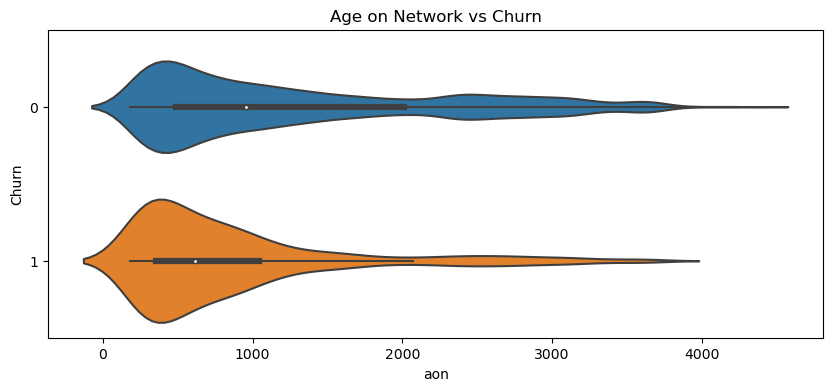

In [67]:
plt.figure(figsize=(10,4))
sns.violinplot(x='aon', y='Churn', data=data)
plt.title('Age on Network vs Churn')
plt.show()

##### Analysis Comments - The customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'

In [68]:
# function for numerical variable univariate analysis
from tabulate import tabulate
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = data, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = data, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = data, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

In [69]:
# function for categorical variable univariate analysis
!pip install sidetable
import sidetable
def cat_univariate_analysis(column_names,figsize=(16,4)) : 
    
    # column vs target count plot
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0],hue='Churn',data=data, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1],hue='Churn',data=data, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2],hue='Churn',data=data, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')

        
    # Percentages 
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

Customers who churned (Churn : 1)
             arpu_6        arpu_7       arpu_8
count   2593.000000   2593.000000  2593.000000
mean     678.716970    550.511946   243.063343
std      551.792864    517.241221   378.843531
min     -209.465000   -158.963000   -37.887000
25%      396.507000    289.641000     0.000000
50%      573.396000    464.674000   101.894000
75%      819.460000    691.588000   351.028000
max    11505.508000  13224.119000  5228.826000

Customers who did not churn (Churn : 0)
             arpu_6        arpu_7        arpu_8
count  27418.000000  27418.000000  27418.000000
mean     578.637360    592.788162    562.453248
std      429.988265    457.265996    492.802655
min    -2258.709000  -2014.045000   -945.808000
25%      362.218000    369.610500    319.118500
50%      489.324000    496.182500    471.024000
75%      690.891750    701.418000    690.921000
max    27731.088000  35145.834000  33543.624000 



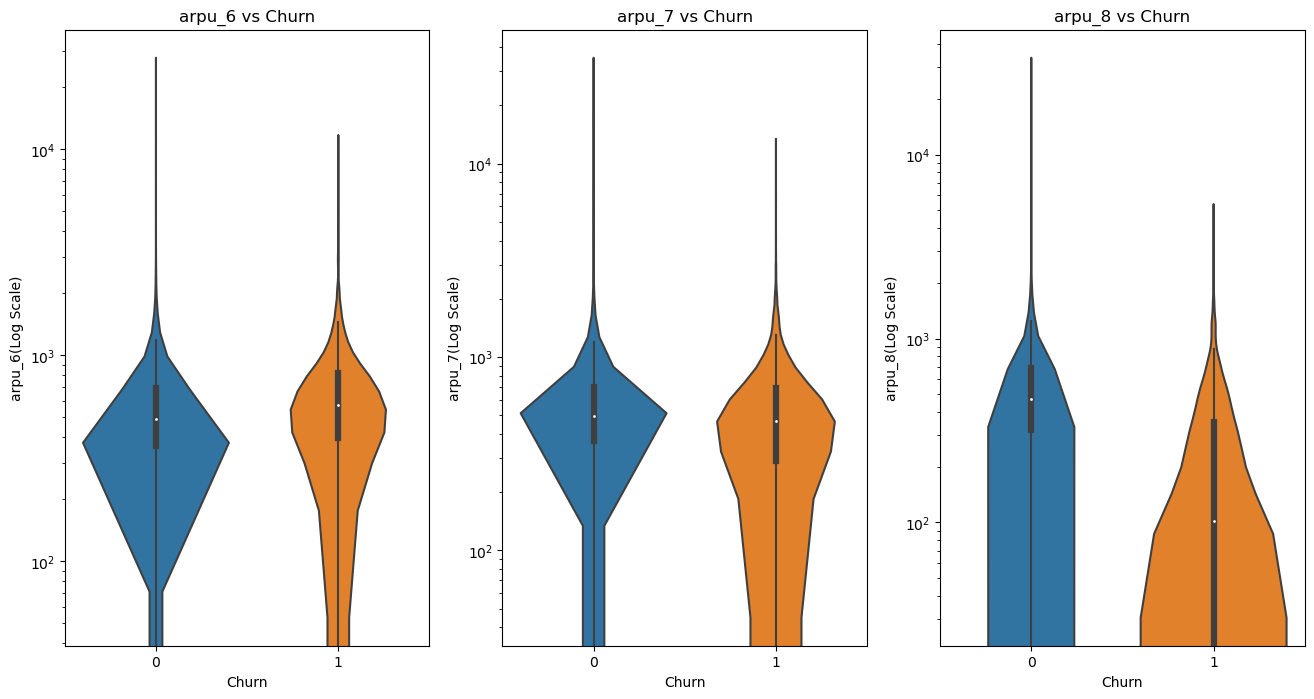

In [70]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(columns,'log')

##### Analysis comments :-
1. We can understand from the above plots that revenue generated by the Customers who are about to churn is very unstable.
2. The Customers whose arpu decreases in 7th month are more likely to churn when compared to ones with increase in arpu.

Customers who churned (Churn : 1)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count     2593.000000     2593.000000     2593.000000
mean       867.961342      677.868909      225.083741
std        852.697688      786.961399      471.672718
min          0.000000        0.000000        0.000000
25%        277.880000      110.090000        0.000000
50%        658.360000      466.910000        0.000000
75%       1209.040000      926.760000      255.810000
max       8488.360000     8285.640000     5206.210000

Customers who did not churn (Churn : 0)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count    27418.000000    27418.000000    27418.000000
mean       669.554896      712.080684      661.480046
std        636.531612      674.580516      691.079113
min          0.000000        0.000000        0.000000
25%        265.682500      284.500000      227.970000
50%        500.410000      529.935000      470.475000
75%        872.070000      931.197500      866.045000
max    

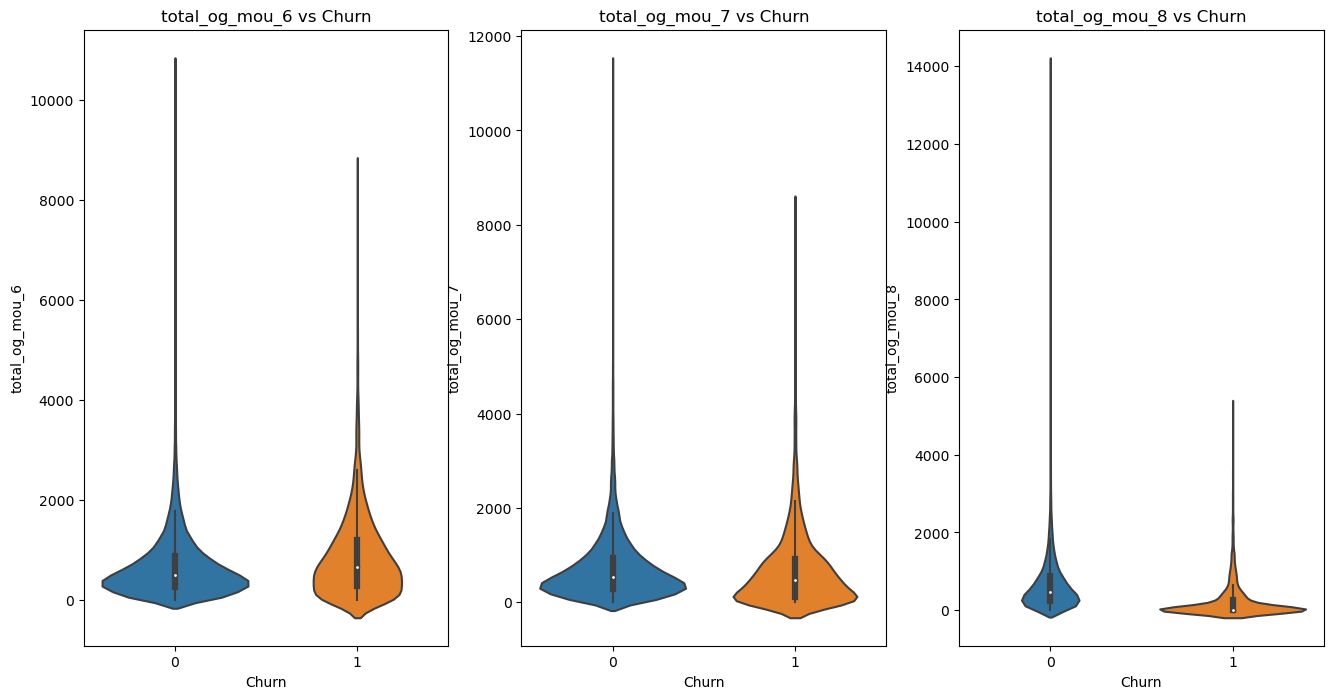

In [71]:
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_univariate_analysis(columns)

Customers who churned (Churn : 1)
       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
count  2593.000000  2593.000000  2593.000000
mean     60.775588    49.054393    15.283185
std     243.084276   219.485813   120.975111
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    4017.160000  3430.730000  3349.190000

Customers who did not churn (Churn : 0)
        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  27418.000000  27418.000000  27418.000000
mean      80.569210     80.925060     74.309036
std      280.420463    285.265125    277.889339
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       16.937500     18.267500     14.245000
max    10285.900000   7873.550000  11117.610000 



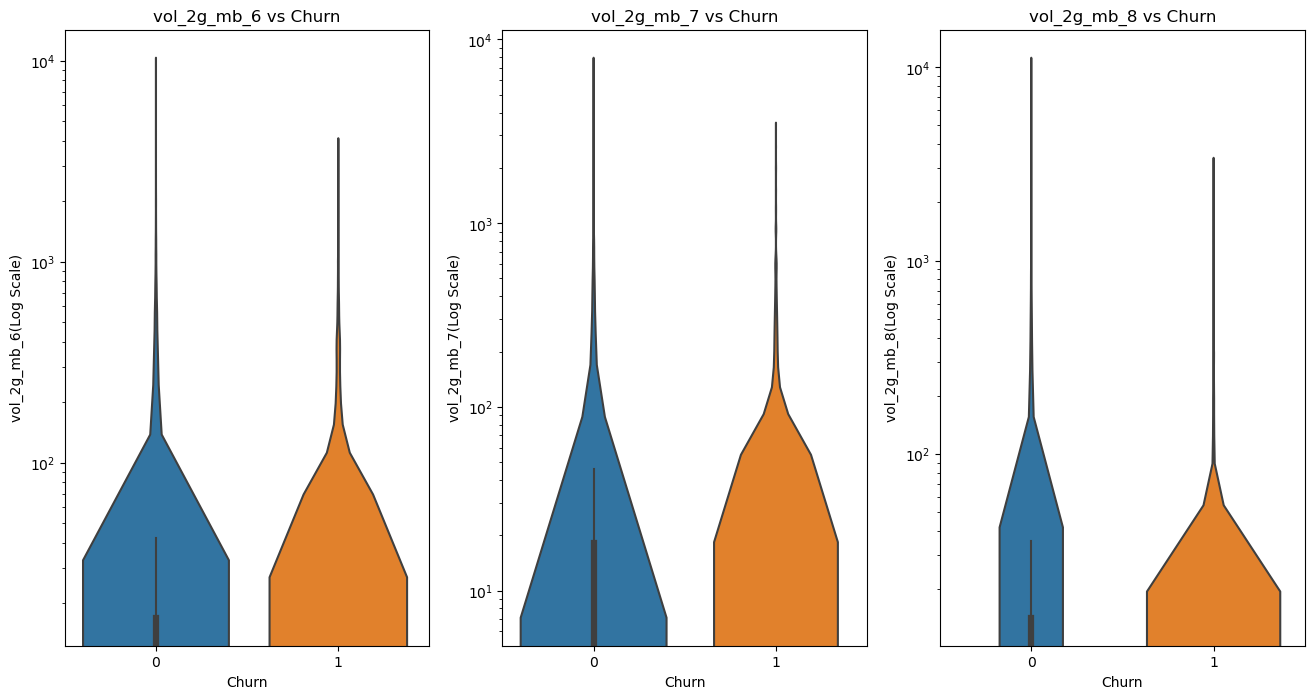

In [72]:
columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
num_univariate_analysis(columns, 'log')

##### Analysis Comments :-
1. Customers with stable usage of 2g volumes throughout 6 and 7 months are less likely to churn.
2. Customers with fall in consumption of 2g volumes in 7th month are more likely to Churn.

Customers who churned (Churn : 1)
       vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  2593.000000   2593.000000   2593.000000   2593.000000
mean    188.395461    157.714254     56.776880      0.134593
std     715.327843    690.773561    446.532769      0.495359
min       0.000000      0.000000      0.000000      0.000000
25%       0.000000      0.000000      0.000000      0.000000
50%       0.000000      0.000000      0.000000      0.000000
75%       0.000000      0.000000      0.000000      0.000000
max    9400.120000  15115.510000  13440.720000      6.000000

Customers who did not churn (Churn : 0)
        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  27418.000000  27418.000000  27418.000000  27418.000000
mean     265.012522    289.478375    290.016390      0.177621
std      878.846885    868.808831    885.821105      0.581065
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50% 

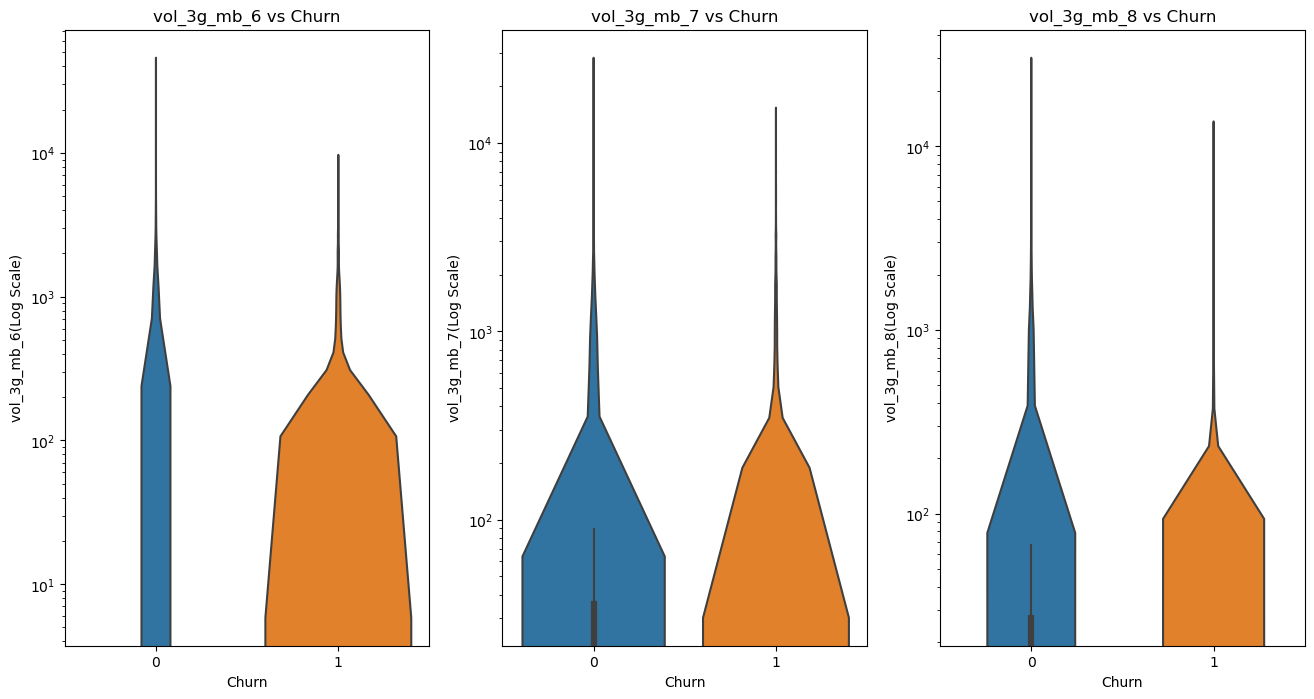

In [73]:
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_3g_6']
num_univariate_analysis(columns, 'log')

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_2g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |              1 |     126 |  4.85924   |               2580 |              99.4987 |
|  2 |              2 |      11 |  0.424219  |               2591 |              99.9229 |
|  3 |              4 |       2 |  0.0771307 |               2593 |             100      |
+----+----------------+---------+------------+--------------------+----------------------+ 

+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_2g_7 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+-----------

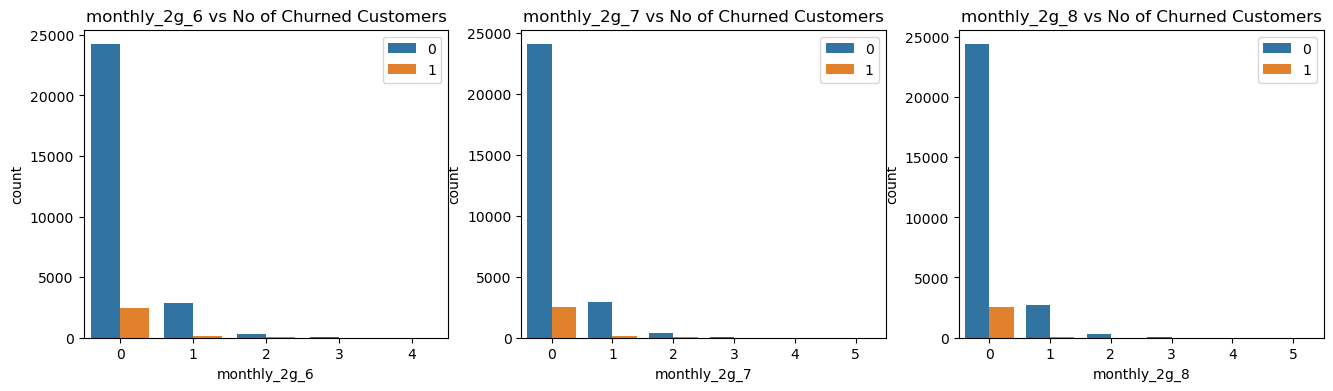

In [74]:
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2352 | 90.7057    |               2352 |              90.7057 |
|  1 |              1 |     170 |  6.55611   |               2522 |              97.2619 |
|  2 |              2 |      49 |  1.8897    |               2571 |              99.1516 |
|  3 |              3 |      13 |  0.50135   |               2584 |              99.6529 |
|  4 |              5 |       4 |  0.154261  |               2588 |              99.8072 |
|  5 |              4 |       4 |  0.154261  |               2592 |              99.9614 |
|  6 |              6 |       1 |  0.0385654 |               2593 |             100      |
+----+----------------+---------+------------+----------

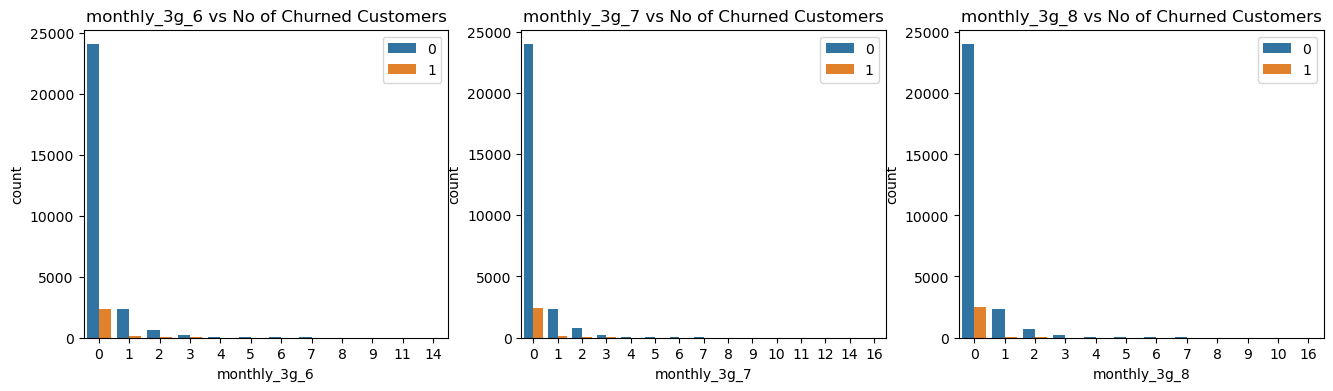

In [75]:
columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
cat_univariate_analysis(columns)

sachet_3g_6    category
sachet_3g_7    category
sachet_3g_8    category
dtype: object
Customers who churned (Churn : 1)
+----+---------------+---------+------------+--------------------+----------------------+
|    |   sachet_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+---------------+---------+------------+--------------------+----------------------|
|  0 |             0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |             1 |      87 |  3.35519   |               2541 |              97.9946 |
|  2 |             2 |      16 |  0.617046  |               2557 |              98.6116 |
|  3 |             4 |      11 |  0.424219  |               2568 |              99.0359 |
|  4 |             3 |       8 |  0.308523  |               2576 |              99.3444 |
|  5 |            10 |       4 |  0.154261  |               2580 |              99.4987 |
|  6 |             7 |       4 |  0.154261  |               2584 |    

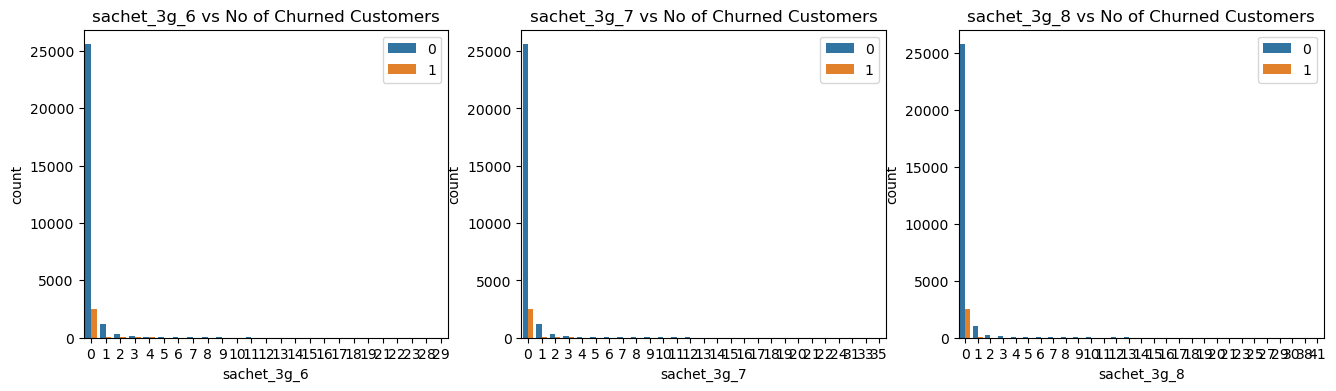

In [76]:
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
print(data[columns].dtypes)
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
          vbc_3g_6     vbc_3g_7     vbc_3g_8
count  2593.000000  2593.000000  2593.000000
mean     81.564601    71.143880    32.610659
std     320.898511   284.882601   197.998246
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    6931.810000  4908.270000  5738.740000

Customers who did not churn (Churn : 0)
           vbc_3g_6      vbc_3g_7      vbc_3g_8
count  27418.000000  27418.000000  27418.000000
mean     125.124167    141.178182    138.597023
std      395.413666    417.292310    402.761779
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      9.940000     17.675000
max    11166.210000   9165.600000  12916.220000 



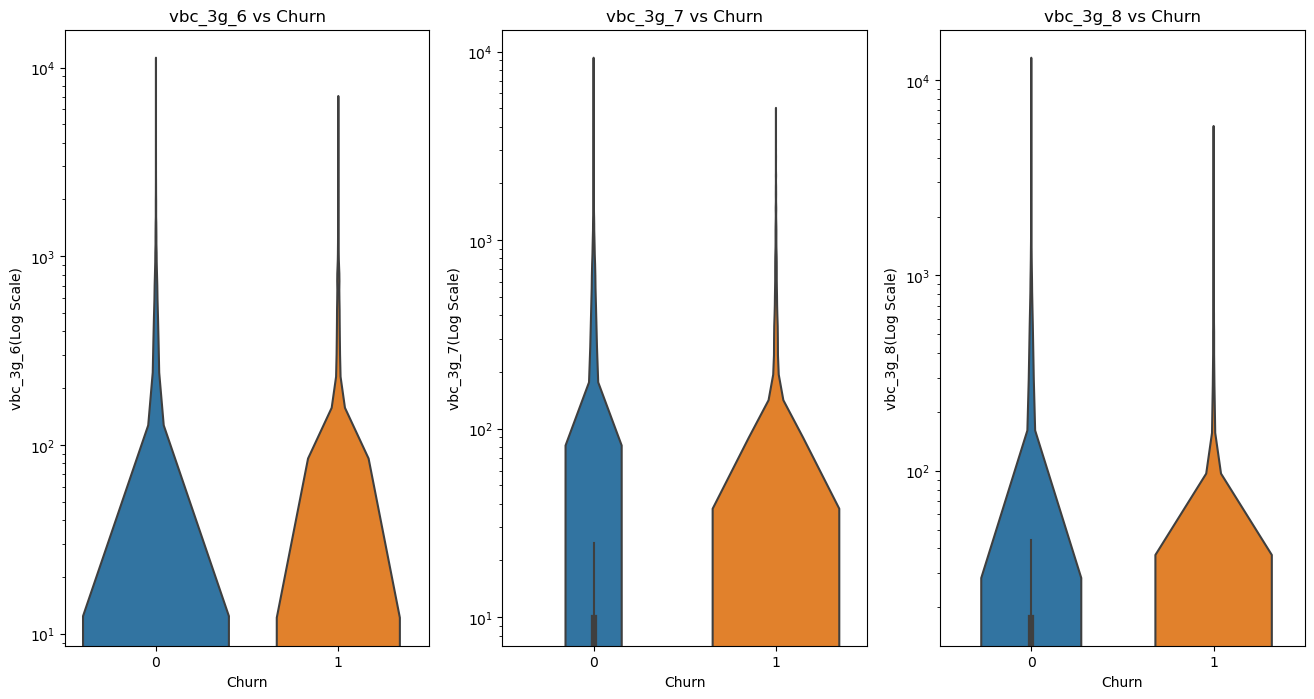

In [77]:
columns = [ 'vbc_3g_6', 'vbc_3g_7','vbc_3g_8']
num_univariate_analysis(columns, 'log')

In [78]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,0,0,315,21.03,910.65,122.16,519.0,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,0,0,0,511,0.00,2.45,21.89,459.0,0
7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0,0,0,0,667,0.00,0.00,0.00,408.0,0


##### Churn Vs Other Features

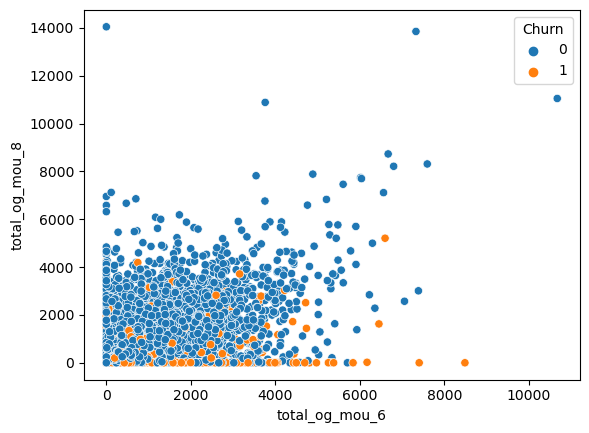

In [79]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['Churn'])
plt.show()

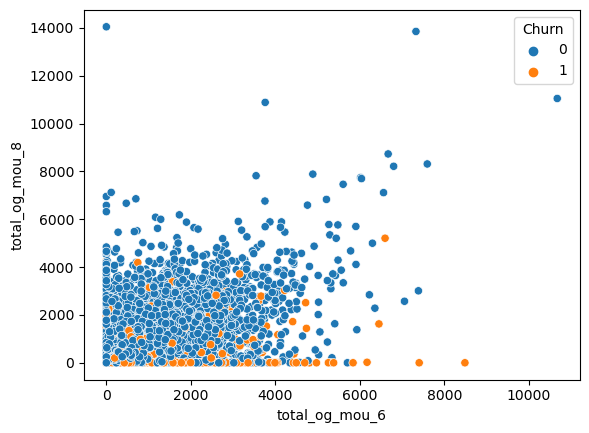

In [80]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['Churn'])
plt.show()

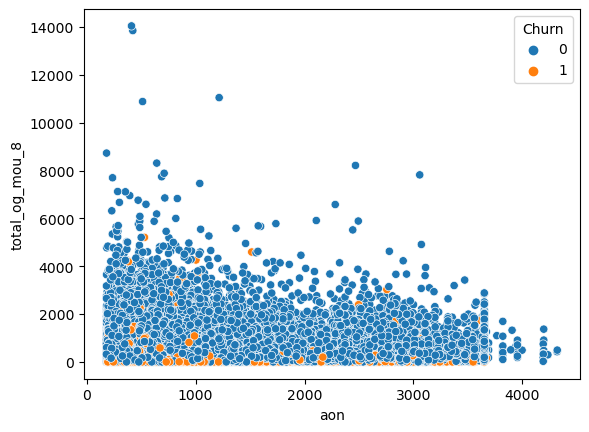

In [81]:
sns.scatterplot(x=data['aon'],y=data['total_og_mou_8'],hue=data['Churn'])
plt.show()

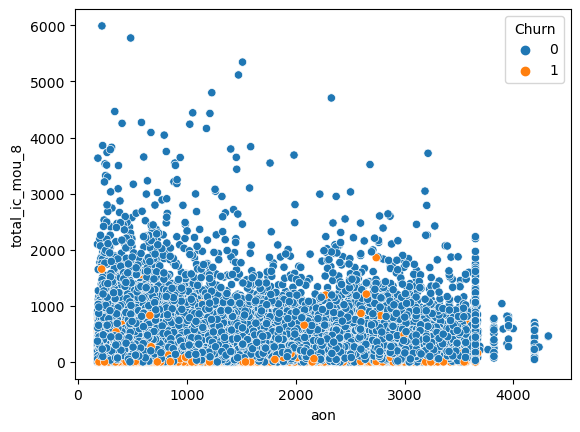

In [82]:
sns.scatterplot(x=data['aon'],y=data['total_ic_mou_8'],hue=data['Churn'])
plt.show()

##### Analysis Comments:-
1. The customers with less total_ic_mou_8 are more likely to churn irrespective of aon.
2. The customers with total_ic_mou_8 > 2000 are very less likely to churn.

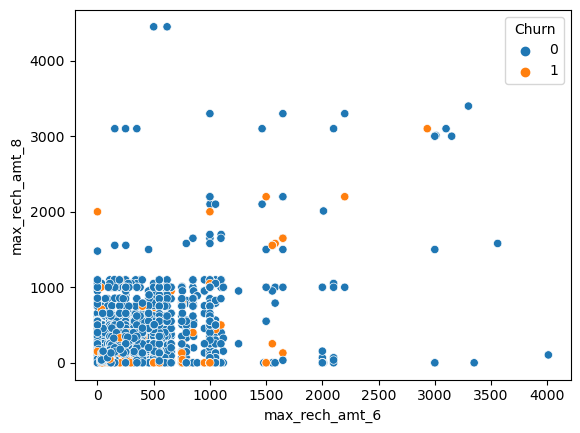

In [83]:
sns.scatterplot(x=data['max_rech_amt_6'],y=data['max_rech_amt_8'],hue=data['Churn'])
plt.show()

##### Correlation Analysis

In [84]:
def correlation(dataframe) : 
    
    columnsForAnalysis = set(dataframe.columns.values) - {'Churn'}
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [85]:
# Correlations for Churn : 0  - non churn customers
# Absolute values are reported 

cor_0 = correlation(non_churned_customers)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
isd_og_mou_7,isd_og_mou_8,0.960000
isd_og_mou_7,isd_og_mou_6,0.950000
isd_og_mou_8,isd_og_mou_6,0.950000
arpu_8,total_rech_amt_8,0.950000
arpu_6,total_rech_amt_6,0.940000
total_rech_amt_7,arpu_7,0.940000
total_rech_amt_7,Average_rech_amt_6n7,0.910000
arpu_7,Average_rech_amt_6n7,0.910000
total_ic_mou_6,loc_ic_mou_6,0.900000
total_rech_amt_6,Average_rech_amt_6n7,0.900000


In [86]:
# Correlations for Churn : 1  - churned customers
# Absolute values are reported 
cor_1 = correlation(churned_customers)

# filtering for correlations >= 40%
condition = cor_1['CORR'] > 0.4
cor_1 = cor_1[condition]
cor_1.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
og_others_7,og_others_8,1.000000
arpu_8,total_rech_amt_8,0.960000
total_rech_amt_7,arpu_7,0.950000
total_og_mou_8,std_og_mou_8,0.950000
std_og_t2t_mou_7,onnet_mou_7,0.950000
arpu_6,total_rech_amt_6,0.950000
total_og_mou_7,std_og_mou_7,0.940000
onnet_mou_8,std_og_t2t_mou_8,0.930000
loc_og_t2f_mou_6,og_others_8,0.930000
loc_og_t2f_mou_6,loc_og_t2f_mou_7,0.930000


##### Data Preparation For Modelling

In [87]:
# Derived variables to measure change in usage 

# Usage 
data['delta_vol_2g'] = data['vol_2g_mb_8'] - data['vol_2g_mb_6'].add(data['vol_2g_mb_7']).div(2)
data['delta_vol_3g'] = data['vol_3g_mb_8'] - data['vol_3g_mb_6'].add(data['vol_3g_mb_7']).div(2)
data['delta_total_og_mou'] = data['total_og_mou_8'] - data['total_og_mou_6'].add(data['total_og_mou_7']).div(2)
data['delta_total_ic_mou'] = data['total_ic_mou_8'] - data['total_ic_mou_6'].add(data['total_ic_mou_7']).div(2)
data['delta_vbc_3g'] = data['vbc_3g_8'] - data['vbc_3g_6'].add(data['vbc_3g_7']).div(2)

# Revenue 
data['delta_arpu'] = data['arpu_8'] - data['arpu_6'].add(data['arpu_7']).div(2)
data['delta_total_rech_amt'] = data['total_rech_amt_8'] - data['total_rech_amt_6'].add(data['total_rech_amt_7']).div(2)

In [88]:
# Removing variables used for derivation : 
data.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

##### Treating Outliers

In [89]:
# Looking at quantiles from 0.90 to 1. 
data.quantile(np.arange(0.9,1.01,0.01)).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,794.980000,824.380000,723.610000,915.580000,935.690000,853.790000,32.730000,18.360000,18.680000,64.480000,41.200000,37.110000,207.930000,207.840000,196.910000,435.160000,437.490000,416.660000,18.380000,18.660000,16.960000,4.040000,4.840000,4.450000,661.740000,657.380000,633.340000,630.530000,663.790000,567.340000,604.410000,645.880000,531.260000,2.200000,2.180000,1.730000,1140.930000,1177.180000,1057.290000,0.000000,0.000000,0.000000,15.930000,19.510000,18.040000,2.260000,0.000000,0.000000,154.880000,156.610000,148.140000,368.540000,364.540000,360.540000,39.230000,41.040000,37.190000,559.280000,558.990000,549.790000,34.730000,36.010000,32.140000,73.380000,75.280000,68.580000,4.360000,4.580000,3.940000,115.910000,118.660000,108.380000,0.280000,0.000000,0.000000,15.010000,18.300000,15.330000,1.160000,1.590000,1.230000,23.000000,23.000000,21.000000,297.000000,300.000000,252.000000,250.000000,250.000000,225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2846.000000,1118.000000,29.835000,170.075000,345.070000,147.300000,69.830000,257.309500,319.000000
0.910000,848.967000,878.352000,783.488000,966.740000,984.020000,899.286000,39.692000,23.281000,23.392000,78.431000,50.012000,46.435000,225.963000,224.873000,213.831000,461.095000,461.812000,441.836000,20.281000,20.680000,18.840000,4.680000,5.512000,5.112000,703.112000,692.668000,669.633000,686.255000,722.843000,622.128000,658.472000,695.767000,583.424000,2.910000,2.800000,2.280000,1195.610000,1244.396000,1125.276000,0.000000,0.000000,0.000000,17.540000,21.283000,19.692000,2.540000,0.000000,0.000000,165.792000,168.033000,159.838000,390.636000,387.112000,382.199000,43.590000,45.392000,41.212000,593.133000,589.645000,580.535000,38.212000,39.912000,35.930000,80.412000,81.931000,75.542000,5.210000,5.491000,4.710000,125.981000,129.288000,118.240000,0.300000,0.000000,0.000000,18.341000,21.841000,18.831000,1.440000,1.940000,1.510000,24.000000,24.000000,22.000000,325.000000,330.000000,289.000000,250.000000,250.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2910.100000,1156.000000,39.883000,227.151000,377.460500,161.801000,95.325000,278.900400,345.500000
0.920000,909.054000,941.990000,848.964000,1031.390000,1038.090000,953.354000,48.710000,29.680000,29.644000,93.598000,60.966000,57.594000,247.944000,244.780000,232.330000,490.630000,488.036000,468.830000,22.560000,23.144000,20.930000,5.450000,6.260000,5.864

In [90]:
data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.910000,6.790988,6.546981,8.274899,5.587715,5.165172,5.328711,21.271005,26.802832,25.224839,21.636166,21.388350,25.127998,8.672630,8.195246,8.593266,5.959877,5.559441,6.042337,10.342764,10.825295,11.084906,15.841584,13.884298,14.876404,6.252002,5.367976,5.730413,8.837803,8.896338,9.656996,8.944591,7.723881,9.818921,32.272727,28.440367,31.791908,4.792581,5.709917,6.430213,nan,nan,nan,10.106717,9.087647,9.157428,12.389381,nan,nan,7.045455,7.293915,7.896584,5.995550,6.191913,6.007378,11.113943,10.604288,10.814735,6.052961,5.483998,5.592135,10.025914,10.835879,11.792159,9.582993,8.835016,10.151648,19.495413,19.890830,19.543147,8.688638,8.956683,9.097619,7.142857,nan,nan,22.191872,19.349727,22.837573,24.137931,22.012579,22.764228,4.347826,4.347826,4.761905,9.427609,10.000000,14.682540,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.252284,3.398927,33.678565,33.559312,9.386646,9.844535,36.510096,8.391023,8.307210
0.920000,7.077660,7.245159,8.356988,6.687424,5.494807,6.012325,22.719944,27.485933,26.727086,19.338017,21.902743,24.031442,9.727699,8.852552,8.651225,6.405405,5.678501,6.109507,11.237118,11.914894,11.093418,16.452991,13.570392,14.710485,5.666807,6.211634,6.262684,9.334285,8.790706,9.318983,8.355405,9.372247,9.794249,28.522337,32.500000,32.017544,6.124071,5.680185,6.755143,inf,inf,nan,9.806157,9.918714,10.603291,12.598425,nan,nan,8.679550,8.010926,8.604963,6.464330,6.436897,6.219535,11.603579,11.614381,12.079006,6.154269,5.887441,5.841336,11.828745,11.700742,11.299750,9.767199,10.348952,10.460406,21.497121,20.378802,22.123142,9.794334,9.954520,10.412720,10.000000,nan,inf,23.123058,23.346001,25.197812,23.611111,22.680412,23.178808,4.166667,4.166667,4.545455,7.692308,6.060606,14.186851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.443215,3.979239,34.548555,27.360654,11.261178,9.607481,33.756098,8.823437,8.538350
0.930000,8.957224,7.872164,8.480572,6.144814,6.342032,6.712302,24.032026,25.61657

In [91]:
# Columns with outliers 
pct_change_99_1 = data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [92]:
# capping outliers to 99th percentile values
outlier_treatment = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in columns_with_outliers : 
    outlier_threshold = data[col].quantile(0.99)
    condition = data[col] > outlier_threshold
    outlier_treatment = outlier_treatment.append({'Column' : col , 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : data.loc[condition,col].shape[0] }, ignore_index=True)
    data.loc[condition, col] = outlier_threshold
outlier_treatment

,Column,Outlier Threshold,Outliers replaced
0,onnet_mou_6,2166.37000,301
1,onnet_mou_7,2220.36700,301
2,onnet_mou_8,2188.50400,301
3,offnet_mou_6,2326.29000,301
4,offnet_mou_7,2410.10400,301
...,...,...,...
98,delta_total_og_mou,1465.10300,301
99,delta_total_ic_mou,619.69100,301
100,delta_vbc_3g,929.64400,301
101,delta_arpu,864.34085,301


In [93]:
categorical = data.dtypes == 'category'
categorical_vars = data.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'Churn'} #independent categorical variables
ind_categorical_vars

{'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

##### Grouping Categories with less contribution

In [94]:
for col in ind_categorical_vars : 
    category_counts = 100*data[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    data[col].replace(low_count_categories,'Others',inplace=True)


 +----+---------------+
|    |   sachet_3g_7 |
|----+---------------|
|  0 |   93.4757     |
|  1 |    4.10849    |
|  2 |    1.03962    |
|  3 |    0.383193   |
|  4 |    0.239912   |
|  5 |    0.219919   |
|  6 |    0.139949   |
|  7 |    0.059978   |
|  9 |    0.0533138  |
|  8 |    0.0466496  |
| 11 |    0.0433175  |
| 10 |    0.0333211  |
| 12 |    0.0333211  |
| 14 |    0.0166606  |
| 15 |    0.0166606  |
| 18 |    0.0133284  |
| 13 |    0.0133284  |
| 19 |    0.00999633 |
| 20 |    0.00999633 |
| 22 |    0.00999633 |
| 17 |    0.00666422 |
| 21 |    0.00666422 |
| 24 |    0.00666422 |
| 16 |    0.00333211 |
| 31 |    0.00333211 |
| 33 |    0.00333211 |
| 35 |    0.00333211 |
+----+---------------+ 

Replaced [3, 4, 5, 6, 7, 9, 8, 11, 10, 12, 14, 15, 18, 13, 19, 20, 22, 17, 21, 24, 16, 31, 33, 35] in sachet_3g_7 with category : Others

 +----+---------------+
|    |   sachet_3g_8 |
|----+---------------|
|  0 |   94.2388     |
|  1 |    3.52537    |
|  2 |    0.839692   |
|  3 |

##### Creating Dummy Variables

In [95]:
dummy_vars = pd.get_dummies(data[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_Others,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,...,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_Others,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_Others
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7001524846,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7002191713,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7000875565,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7000187447,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [96]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

['sachet_3g_7_Others',
 'sachet_3g_8_Others',
 'sachet_2g_7_Others',
 'sachet_2g_6_Others',
 'sachet_3g_6_Others',
 'sachet_2g_8_Others']

In [97]:
# concatenating dummy variables with original 'data'
data.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
data = pd.concat([data, dummy_vars], axis=1)
data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_2g_6_4,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,...,0,1,0,0,1,0,0,0,0,0
7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,...,0,1,0,0,0,0,0,1,0,0
7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,...,0,1,0,0,0,0,0,1,0,0
7000875565,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,...,0,1,0,0,1,0,0,0,0,0
7000187447,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,...,0,1,0,0,1,0,0,0,0,0


In [98]:
dummy_cols = dummy_vars.columns.to_list()
data[dummy_cols] = data[dummy_cols].astype('category')

In [99]:
data.shape

(30011, 131)

##### Model Building

In [100]:
y = data.pop('Churn') # Predicted / Target Variable
X = data # Predictor variables

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

##### Class Imbalance

In [102]:
y.value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


In [103]:
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.095


##### Handle Class Imbalance - Using SMOTE

In [113]:
!pip install imblearn

In [115]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install imblearn smote

In [5]:
!pip uninstall scikit-learn --yes

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 103, in run
    uninstall_pathset.commit()
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 424, in commit
    self._moved_paths.commit()
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 277, in commit
    save_dir.cleanup()
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 328, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 408, in __call__
    do = self

In [6]:
!pip uninstall imblearn --yes

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [7]:
!pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)


In [8]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [104]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_2g_6_4,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5
0,53.01,52.64,37.48,316.01,195.74,68.36,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
1,91.39,216.14,150.58,504.19,301.98,434.41,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
2,11.96,14.13,0.40,1.51,0.00,0.00,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
3,532.66,537.31,738.21,49.03,71.64,39.43,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
4,122.68,105.51,149.33,302.23,211.44,264.11,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0


##### Standardizing Columns

In [105]:
# columns with numerical data
condition1 = data.dtypes == 'int'
condition2 = data.dtypes == 'float'
numerical_vars = data.columns[condition1 | condition2].to_list()

In [106]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [107]:
# summary statistics of standardized variables
round(X_train_resampled.describe(),2)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
count,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,...,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,...,0.10,1074.47,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.39,886.36,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.73,-0.68,-0.53,-0.94,-0.89,-0.70,-0.31,-0.32,-0.33,-0.33,...,0.00,180.00,-0.91,-28.14,-27.16,-11.65,-14.66,-22.68,-14.96,-14.68
25%,-0.63,-0.60,-0.52,-0.66,-0.65,-0.66,-0.31,-0.32,-0.33,-0.33,...,0.00,424.00,-0.68,0.12,0.11,-0.41,-0.22,0.08,-0.51,-0.48
50%,-0.42,-0.41,-0.40,-0.33,-0.33,-0.36,-0.31,-0.32,-0.33,-0.33,...,0.00,733.00,-0.35,0.15,0.11,0.23,0.13,0.08,0.08,0.03
75%,0.20,0.15,0.01,0.27,0.26,0.23,-0.27,-0.25,-0.22,-0.28,...,0.00,1419.75,0.30,0.15,0.11,0.50,0.36,0.08,0.58,0.58
max,4.09,4.46,5.67,4.02,4.45,5.24,6.11,6.09,6.19,5.41,...,3.00,4321.00,4.46,4.05,4.24,2.96,3.13,4.48,2.84,2.84


##### Logistic Resgression 

In [108]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [109]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [110]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [111]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [112]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15992  3195]
 [  322  1498]]

Confusion Matrix for test: 
 [[6786 1445]
 [ 305  468]]


In [113]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.833
Sensitivity / True Positive Rate / Recall : 0.823
Specificity / True Negative Rate :  0.833
Precision / Positive Predictive Value : 0.319
F1-score : 0.46


Test Performance : 

Accuracy : 0.806
Sensitivity / True Positive Rate / Recall : 0.605
Specificity / True Negative Rate :  0.824
Precision / Positive Predictive Value : 0.245
F1-score : 0.349


##### Baseline Performance - Finding Optimum Probability Cutoff

In [114]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,1,1,1,1,0,0,0,0,0
7001343085,1,1,1,0,0,0,0,0,0,0
7001863283,1,1,0,0,0,0,0,0,0,0
7002275981,1,1,1,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [115]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.087
0.1,0.975,0.341,0.396
0.2,0.947,0.521,0.558
0.3,0.911,0.656,0.678
0.4,0.866,0.761,0.770
0.5,0.823,0.833,0.833
0.6,0.771,0.883,0.873
0.7,0.673,0.921,0.899
0.8,0.489,0.953,0.913
0.9,0.229,0.981,0.916


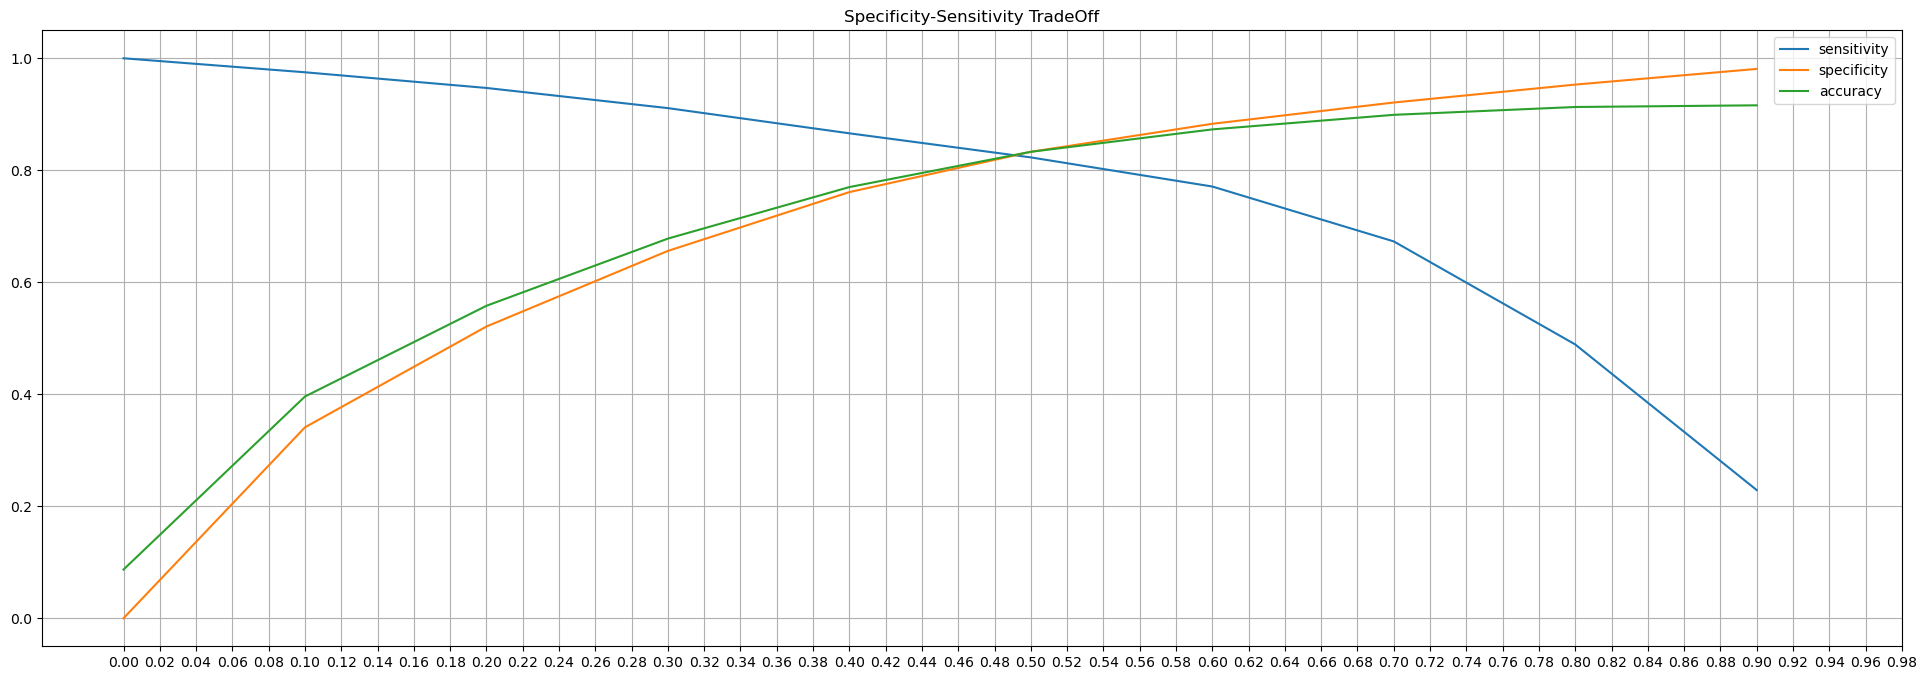

In [116]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

##### Baseline Performance at Optimum Cutoff

In [117]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15878  3309]
 [  318  1502]]

Confusion Matrix for test: 
 [[6497 1734]
 [ 249  524]]


In [118]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.827
Sensitivity / True Positive Rate / Recall : 0.825
Specificity / True Negative Rate :  0.828
Precision / Positive Predictive Value : 0.312
F1-score : 0.453


Test Performance : 

Accuracy : 0.78
Sensitivity / True Positive Rate / Recall : 0.678
Specificity / True Negative Rate :  0.789
Precision / Positive Predictive Value : 0.232
F1-score : 0.346


In [119]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.891 

ROC AUC score for Test :  0.778


##### Feature Selection Using RFE

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [125]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=logreg,n_features_to_select=15)
rfe=rfe.fit(X_train, y_train)

In [126]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [127]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
35,std_og_t2f_mou_8,1,True
90,monthly_2g_6,1,True
39,isd_og_mou_6,1,True
105,sachet_3g_7_0,1,True
44,spl_og_mou_8,1,True
...,...,...,...
120,sachet_2g_6_4,112,False
84,max_rech_amt_6,113,False
107,sachet_3g_7_2,114,False
46,og_others_7,115,False


In [128]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['std_og_t2f_mou_8',
 'monthly_2g_6',
 'isd_og_mou_6',
 'sachet_3g_7_0',
 'spl_og_mou_8',
 'total_rech_num_8',
 'monthly_2g_7',
 'total_rech_num_7',
 'sachet_3g_8_0',
 'loc_ic_t2m_mou_8',
 'sachet_3g_6_0',
 'loc_ic_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'total_rech_num_6',
 'monthly_2g_8']

In [131]:
cols=X_train.columns[rfe.support_]
cols

Index(['std_og_t2f_mou_8', 'isd_og_mou_6', 'spl_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_3g_7_0', 'sachet_3g_8_0', 'sachet_3g_6_0'],
      dtype='object')

In [132]:
import statsmodels.api as sm

##### Model-1

In [133]:
X_train_sm=sm.add_constant(X_train[cols])
logm1=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4505.1
Date:                Mon, 08 Jan 2024   Deviance:                       9010.1
Time:                        00:20:46   Pearson chi2:                 2.42e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1483
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7206      0.214     -8.023      0.000      -2.141      -1.300
std_og_t2f_mou_8    -0.0331      0.011     -2.920      0.004      -0.055      -0.011
isd_og_mou_6         0.0153      0.005      3.376      0.001       0.006       0.024
spl_og_mou_8        -0.0166      0.004     -4.629      0.000      -0.024      -0.010
loc_ic_t2m_mou_8    -0.0128      0.001    -20.560      0.000      -0.014      -0.012
loc_ic_t2f_mou_8    -0.0181      0.003     -5.327      0.000      -0.025      -0.011
std_ic_t2f_mou_8    -0.0238      0.009     -2.507      0.012      -0.042      -0.005
total_rech_num_6     0.0388      0.004     10.219      0.000       0.031       0.046
total_rech_num_7     0.0377      0.005      7.921      0.000       0.028       0.047
total_rech_num_8    -0.1439      0.007    -22.045      0.000      -0.157      -0.131
monthly_2g_6        -0.0331      0.116     -0.285      0.776      -0.261       0.195
monthly_2g_7        -0.2646      0.123     -2.152      0.031      -0.506      -0.024
monthly_2g_8        -1.4995      0.222     -6.770      0.000      -1.934      -1.065
sachet_3g_7_0       -0.2590      0.139     -1.859      0.063      -0.532       0.014
sachet_3g_8_0        0.8651      0.210      4.112      0.000       0.453       1.278
sachet_3g_6_0        0.1709      0.137      1.245      0.213      -0.098       0.440
====================================================================================
"""

##### Logistic Regression with Manual Feature Elimination

In [138]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,sachet_3g_8_0,19.71
12,sachet_3g_7_0,19.57
14,sachet_3g_6_0,17.85
7,total_rech_num_7,8.49
8,total_rech_num_8,5.95
6,total_rech_num_6,5.53
3,loc_ic_t2m_mou_8,1.93
10,monthly_2g_7,1.89
9,monthly_2g_6,1.79
11,monthly_2g_8,1.76


##### 'monthly_2g_6' has the very p-value. Hence, this feature could be eliminated

In [140]:
selected_columns = rfe_selected_columns
selected_columns.remove('monthly_2g_6')
selected_columns

['std_og_t2f_mou_8',
 'isd_og_mou_6',
 'sachet_3g_7_0',
 'spl_og_mou_8',
 'total_rech_num_8',
 'monthly_2g_7',
 'total_rech_num_7',
 'sachet_3g_8_0',
 'loc_ic_t2m_mou_8',
 'sachet_3g_6_0',
 'loc_ic_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'total_rech_num_6',
 'monthly_2g_8']

##### Model-II

In [142]:
X_train_sm=sm.add_constant(X_train[selected_columns])
logm2=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result=logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4505.1
Date:                Mon, 08 Jan 2024   Deviance:                       9010.2
Time:                        00:26:54   Pearson chi2:                 2.42e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1483
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7236      0.214     -8.046      0.000      -2.144      -1.304
std_og_t2f_mou_8    -0.0331      0.011     -2.920      0.003      -0.055      -0.011
isd_og_mou_6         0.0153      0.005      3.376      0.001       0.006       0.024
sachet_3g_7_0       -0.2587      0.139     -1.857      0.063      -0.532       0.014
spl_og_mou_8        -0.0166      0.004     -4.631      0.000      -0.024      -0.010
total_rech_num_8    -0.1438      0.007    -22.044      0.000      -0.157      -0.131
monthly_2g_7        -0.2761      0.116     -2.375      0.018      -0.504      -0.048
total_rech_num_7     0.0378      0.005      7.939      0.000       0.028       0.047
sachet_3g_8_0        0.8661      0.210      4.118      0.000       0.454       1.278
loc_ic_t2m_mou_8    -0.0128      0.001    -20.560      0.000      -0.014      -0.012
sachet_3g_6_0        0.1708      0.137      1.244      0.213      -0.098       0.440
loc_ic_t2f_mou_8    -0.0182      0.003     -5.330      0.000      -0.025      -0.011
std_ic_t2f_mou_8    -0.0238      0.009     -2.508      0.012      -0.042      -0.005
total_rech_num_6     0.0388      0.004     10.217      0.000       0.031       0.046
monthly_2g_8        -1.5127      0.217     -6.979      0.000      -1.938      -1.088
====================================================================================
"""

##### Analysis Comments - 'sachet_3g_6_0' has very high p-value. Hence this could be removed

In [143]:
selected_columns.remove('sachet_3g_6_0')
selected_columns

['std_og_t2f_mou_8',
 'isd_og_mou_6',
 'sachet_3g_7_0',
 'spl_og_mou_8',
 'total_rech_num_8',
 'monthly_2g_7',
 'total_rech_num_7',
 'sachet_3g_8_0',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'total_rech_num_6',
 'monthly_2g_8']

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_columns].values, i) for i in range(X_train[selected_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,sachet_3g_8_0,15.98
2,sachet_3g_7_0,15.56
6,total_rech_num_7,8.46
4,total_rech_num_8,5.93
11,total_rech_num_6,5.51
8,loc_ic_t2m_mou_8,1.92
5,monthly_2g_7,1.61
12,monthly_2g_8,1.60
9,loc_ic_t2f_mou_8,1.39
3,spl_og_mou_8,1.34


In [147]:
selected_columns.remove('sachet_3g_8_0')
selected_columns

['std_og_t2f_mou_8',
 'isd_og_mou_6',
 'sachet_3g_7_0',
 'spl_og_mou_8',
 'total_rech_num_8',
 'monthly_2g_7',
 'total_rech_num_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'total_rech_num_6',
 'monthly_2g_8']

In [178]:
X_train_sm=sm.add_constant(X_train[selected_columns])
logm3=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result=logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4517.9
Date:                Mon, 08 Jan 2024   Deviance:                       9035.9
Time:                        00:50:31   Pearson chi2:                 1.69e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1472
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0059      0.133     -7.566      0.000      -1.266      -0.745
std_og_t2f_mou_8    -0.0334      0.011     -2.937      0.003      -0.056      -0.011
isd_og_mou_6         0.0156      0.005      3.444      0.001       0.007       0.025
sachet_3g_7_0        0.0599      0.122      0.490      0.624      -0.180       0.300
spl_og_mou_8        -0.0171      0.004     -4.740      0.000      -0.024      -0.010
total_rech_num_8    -0.1463      0.007    -22.476      0.000      -0.159      -0.134
monthly_2g_7        -0.2930      0.116     -2.524      0.012      -0.520      -0.065
total_rech_num_7     0.0386      0.005      8.128      0.000       0.029       0.048
loc_ic_t2m_mou_8    -0.0127      0.001    -20.551      0.000      -0.014      -0.012
loc_ic_t2f_mou_8    -0.0185      0.003     -5.415      0.000      -0.025      -0.012
std_ic_t2f_mou_8    -0.0237      0.010     -2.492      0.013      -0.042      -0.005
total_rech_num_6     0.0382      0.004     10.101      0.000       0.031       0.046
monthly_2g_8        -1.4951      0.216     -6.908      0.000      -1.919      -1.071
====================================================================================
"""

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_columns].values, i) for i in range(X_train[selected_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_rech_num_7,8.31
4,total_rech_num_8,5.89
10,total_rech_num_6,5.49
2,sachet_3g_7_0,3.42
7,loc_ic_t2m_mou_8,1.91
5,monthly_2g_7,1.61
11,monthly_2g_8,1.59
8,loc_ic_t2f_mou_8,1.39
3,spl_og_mou_8,1.34
9,std_ic_t2f_mou_8,1.29


##### Model Performance

In [153]:
# Prediction 
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

mobile_number
7000166926    0.012166
7001343085    0.004937
7001863283    0.184078
7002275981    0.024632
7001086221    0.000294
7001688896    0.007995
7001005700    0.124721
7000528284    0.081493
7000276557    0.001038
7000553625    0.207771
dtype: float64

In [154]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01216569, 0.00493685, 0.1840778 , 0.02463196, 0.00029402,
       0.00799464, 0.12472077, 0.08149329, 0.00103781, 0.20777053])

In [157]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.012166,7000166926
1,0,0.004937,7001343085
2,0,0.184078,7001863283
3,0,0.024632,7002275981
4,0,0.000294,7001086221


In [158]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [159]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.012166,7000166926,0
1,0,0.004937,7001343085,0
2,0,0.184078,7001863283,0
3,0,0.024632,7002275981,0
4,0,0.000294,7001086221,0


##### Confusion Matrix

In [160]:
from sklearn import metrics

In [161]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[19067   120]
 [ 1585   235]]


##### Overall Accuracy

In [162]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.9188365782834294


In [163]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [164]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.12912087912087913


In [165]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.9937457653619638


In [166]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.00625423463803617


In [167]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6619718309859155


In [168]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.9232519852798761


##### ROC Curve

In [169]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [170]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

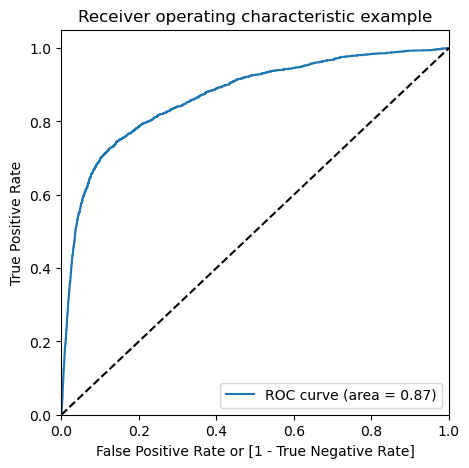

In [171]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### Finding Optimal cut-off point

In [172]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.012166,7000166926,0,1,0,0,0,0,0,0,0,0,0
1,0,0.004937,7001343085,0,1,0,0,0,0,0,0,0,0,0
2,0,0.184078,7001863283,0,1,1,0,0,0,0,0,0,0,0
3,0,0.024632,7002275981,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000294,7001086221,0,1,0,0,0,0,0,0,0,0,0


In [173]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086638  1.000000  0.000000
0.1   0.1  0.769696  0.803846  0.766456
0.2   0.2  0.887704  0.684066  0.907020
0.3   0.3  0.923740  0.487912  0.965081
0.4   0.4  0.922264  0.256593  0.985407
0.5   0.5  0.918837  0.129121  0.993746
0.6   0.6  0.916123  0.065385  0.996821
0.7   0.7  0.914314  0.027473  0.998436
0.8   0.8  0.913933  0.012088  0.999479
0.9   0.9  0.913553  0.002198  1.000000


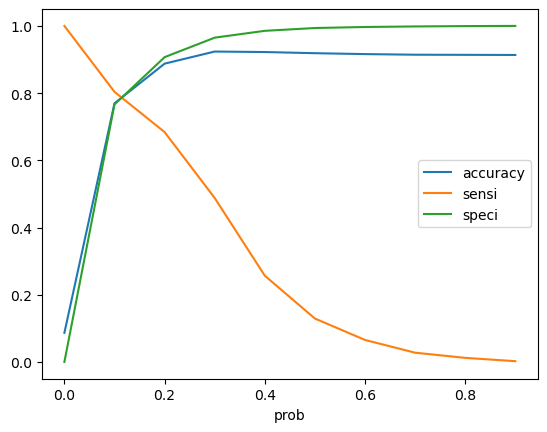

In [176]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show() 

In [177]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.827
Sensitivity / True Positive Rate / Recall : 0.825
Specificity / True Negative Rate :  0.828
Precision / Positive Predictive Value : 0.312
F1-score : 0.453


Test Performance : 

Accuracy : 0.78
Sensitivity / True Positive Rate / Recall : 0.678
Specificity / True Negative Rate :  0.789
Precision / Positive Predictive Value : 0.232
F1-score : 0.346


In [183]:
lr_summary_html = logm3.fit().summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



monthly_2g_8       -1.4951
const              -1.0059
monthly_2g_7       -0.2930
total_rech_num_8   -0.1463
sachet_3g_7_0       0.0599
total_rech_num_7    0.0386
total_rech_num_6    0.0382
std_og_t2f_mou_8   -0.0334
std_ic_t2f_mou_8   -0.0237
loc_ic_t2f_mou_8   -0.0185
spl_og_mou_8       -0.0171
isd_og_mou_6        0.0156
loc_ic_t2m_mou_8   -0.0127
Name: coef, dtype: float64